## Exploratory Data Analisys
### Izquierda Diario

### Load tokens

In [1]:
import pandas as pd

In [2]:
token_df = pd.read_pickle('tokens/topic_tokens_izq.pkl')

In [3]:
token_df

,topics,abajo,abril,abrupta,absorber,aca,acceder,acceso,accesorios,aceitera,...,vpower,vuelca,vuelve,vuelven,vulnerables,vulneradoste,wall,yendo,yeso,ypf
doc1,inflation,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
doc2,inflation,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc3,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc4,inflation,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,4
doc5,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
doc6,inflation,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc7,inflation,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc8,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc9,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc10,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Get docs by topics

### Count words in/between doc(s)

#### Inflation topics

In [10]:
inflation = token_df[token_df.topics == 'inflation'].drop('topics', axis=1)

In [22]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [23]:
top_words = count_words(inflation)

In [26]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc1
[('us', 7), ('millones', 6), ('exportaciones', 5), ('bienes', 4), ('importaciones', 4), ('interanual', 3), ('indec', 3), ('manufacturas', 2), ('octubre', 2), ('comercio', 2), ('baja', 2), ('superavit', 2), ('combustibles', 2), ('interesar', 2), ('balanza', 2), ('origen', 2), ('precios', 2), ('descenso', 2), ('exterior', 2), ('puede', 2), ('exportadores', 2), ('ano', 2), ('bajaron', 2), ('mas', 2), ('caida', 2), ('capital', 2), ('millonesel', 1), ('dolares', 1), ('tercios', 1), ('escaseanen', 1)]
-------------
doc2
[('emae', 4), ('septiembre', 3), ('ia', 3), ('interanual', 3), ('economica', 2), ('ano', 2), ('relacion', 2), ('actividad', 2), ('caida', 2), ('economia', 1), ('comunicaciones', 1), ('publicado', 1), ('rem', 1), ('pasar', 1), ('suba', 1), ('direccion', 1), ('mensual', 1), ('bcra', 1), ('mercado', 1), ('patronales', 1), ('meses', 1), ('contraera', 1), ('beneficio', 1), ('pbi', 1), ('pedido', 1), ('nueve', 1), ('reparaciones', 1), ('sociales', 1), ('ultimo', 1), ('central'

There are almost no word repetitions in each document

In [27]:
from collections import Counter

In [29]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [30]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('ano', 11)
('precios', 10)
('indec', 8)
('aumento', 8)
('octubre', 7)
('suba', 7)
('gobierno', 7)
('inflacion', 7)
('mes', 7)
('incremento', 6)
('mas', 5)
('trabajadores', 5)
('septiembre', 4)
('economica', 4)
('productos', 4)
('mismo', 4)
('sector', 4)
('paritarias', 4)
('agosto', 4)
('respecto', 4)
('canasta', 4)
('interanual', 3)
('combustibles', 3)
('interesar', 3)
('puede', 3)
('caida', 3)
('economia', 3)
('direccion', 3)
('mientras', 3)
('fin', 3)
('aumentos', 3)
('promedio', 3)
('salarios', 3)
('salario', 3)
('segun', 3)
('sectores', 3)
('servicios', 3)
('indice', 3)
('registro', 3)
('consecuencia', 3)
('parte', 3)
('alimentos', 3)
('registraron', 3)
('bienes', 2)
('baja', 2)
('descenso', 2)
('emae', 2)
('actividad', 2)
('patronales', 2)
('meses', 2)


#### Currency exchange topics

In [31]:
exchange = token_df[token_df.topics == 'exchange'].drop('topics', axis=1)

In [32]:
top_words = count_words(exchange)

In [34]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc17
[('dias', 5), ('dolar', 4), ('cnv', 4), ('local', 4), ('bolsa', 3), ('bonos', 3), ('mep', 3), ('moneda', 3), ('dolares', 2), ('dos', 2), ('humanas', 2), ('realizan', 2), ('receptora', 2), ('venden', 2), ('resolucion', 2), ('netos', 2), ('valor', 2), ('negociable', 2), ('plazo', 2), ('carteras', 2), ('dispuso', 2), ('brecha', 2), ('medidas', 2), ('tres', 2), ('juridicas', 2), ('extranjera', 2), ('mas', 2), ('transferencia', 2), ('alycs', 2), ('luego', 2)]
-------------
doc18
[('dolar', 6), ('mientras', 3), ('dolares', 3), ('ccl', 2), ('nuevas', 2), ('fmi', 2), ('mep', 2), ('oficial', 2), ('soja', 1), ('mercados', 1), ('dia', 1), ('paralelo', 1), ('vaciadores', 1), ('mas', 1), ('conducen', 1), ('solidario', 1), ('expresan', 1), ('despues', 1), ('condensa', 1), ('subas', 1), ('costa', 1), ('parches', 1), ('pesar', 1), ('retenciones', 1), ('mayorista', 1), ('niveles', 1), ('paralelas', 1), ('subastras', 1), ('festival', 1), ('suman', 1)]
-------------
doc19
[('dolar', 5), ('bonos', 3

In [36]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [37]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('dolar', 13)
('guzman', 10)
('bonos', 9)
('dolares', 9)
('mas', 9)
('banco', 7)
('deuda', 7)
('puede', 6)
('mep', 5)
('medidas', 5)
('oficial', 5)
('solidario', 5)
('blue', 5)
('central', 5)
('us', 5)
('millones', 5)
('dias', 4)
('mayorista', 4)
('cambio', 4)
('contado', 4)
('pesos', 4)
('economia', 4)
('gobierno', 4)
('devaluacion', 4)
('brecha', 3)
('ccl', 3)
('fmi', 3)
('soja', 3)
('liqui', 3)
('jueves', 3)
('financiero', 3)
('habia', 3)
('grandes', 3)
('liquidacion', 3)
('martes', 3)
('semana', 3)
('haber', 3)
('bolsa', 2)
('valor', 2)
('tres', 2)
('alycs', 2)
('luego', 2)
('mientras', 2)
('nuevas', 2)
('dia', 2)
('pesar', 2)
('retenciones', 2)
('medida', 2)
('subio', 2)
('emitido', 2)


There are not a significant number of word repetions among documents. Therefore, the only ones to be erase would be those who habe no contextual meaning.

In [61]:
more_stop_words = ['dia', 'fin','dias', 'dos', 'mas','ano', 'asi','puede']

In [40]:
inflation.drop(more_stop_words, axis=1, inplace=True)

In [41]:
exchange.drop(more_stop_words, axis=1, inplace=True)

### Visual Representation
#### Words Frequency

In [57]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [58]:
df = pd.read_csv('./data/izq_econ_news.csv')
df_inflation = df.loc[df.flyer.str.contains('INFLA|INDEC|SUBA|PRECIO', na=False),'body'].values
df_exchange = df.loc[df.flyer.str.contains('BRECHA|CAMBI|RESERV', na=False), 'body'].values

In [66]:
stopwords_sp = stopwords.words('spanish')
stopwords_sp = stopwords_sp + more_stop_words

In [95]:
plt.rcParams['figure.figsize'] = [16 , 8]
cloud = WordCloud(stopwords=stopwords_sp, background_color='white')

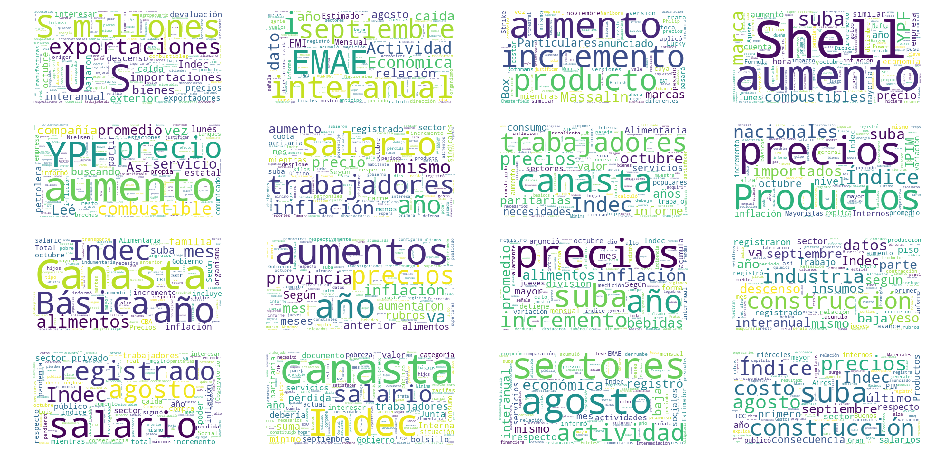

In [96]:
for index, doc in enumerate(df_inflation):
    cloud.generate(doc)
    plt.subplot(4, 4, index + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()    

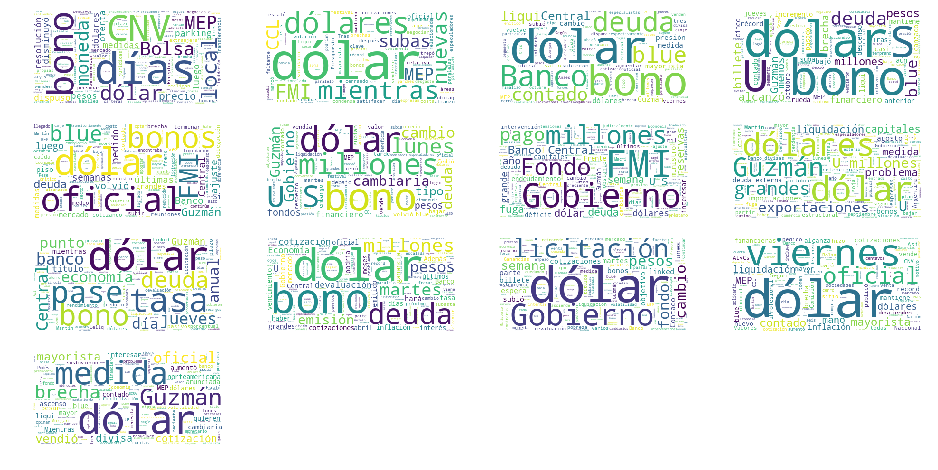

In [97]:
for index, doc in enumerate(df_exchange):
    cloud.generate(doc)
    plt.subplot(4, 4, index + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()    